In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.isnull().sum() 

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
for col in df.columns: 
    missing= np.mean (df [col].isnull()) 
    print('{} {} %'.format(col, round (missing*100))) 

ID 0 %
Source 0 %
Severity 0 %
Start_Time 0 %
End_Time 0 %
Start_Lat 0 %
Start_Lng 0 %
End_Lat 44 %
End_Lng 44 %
Distance(mi) 0 %
Description 0 %
Street 0 %
City 0 %
County 0 %
State 0 %
Zipcode 0 %
Country 0 %
Timezone 0 %
Airport_Code 0 %
Weather_Timestamp 2 %
Temperature(F) 2 %
Wind_Chill(F) 26 %
Humidity(%) 2 %
Pressure(in) 2 %
Visibility(mi) 2 %
Wind_Direction 2 %
Wind_Speed(mph) 7 %
Precipitation(in) 29 %
Weather_Condition 2 %
Amenity 0 %
Bump 0 %
Crossing 0 %
Give_Way 0 %
Junction 0 %
No_Exit 0 %
Railway 0 %
Roundabout 0 %
Station 0 %
Stop 0 %
Traffic_Calming 0 %
Traffic_Signal 0 %
Turning_Loop 0 %
Sunrise_Sunset 0 %
Civil_Twilight 0 %
Nautical_Twilight 0 %
Astronomical_Twilight 0 %


In [7]:
numeric_cols = df._get_numeric_data().columns
print(len(numeric_cols))

26


In [8]:
numeric_df = df.select_dtypes (include=['float64', 'int64']) 
print(len(numeric_df.columns),numeric_df.columns)

13 Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


In [9]:
missing_percent = df.isnull().sum().sort_values (ascending = False) / len (df) 
print(missing_percent)

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [10]:
missing_percent[missing_percent !=0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

Text(0.5, 0, 'Missing Values In Percentage')

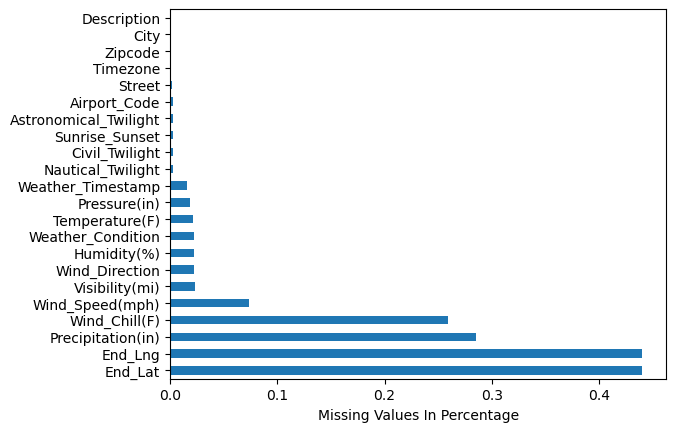

In [11]:
missing_percent[missing_percent !=0].plot(kind='barh')
plt.xlabel('Missing Values In Percentage')


In [12]:
print(len(df.columns))

46


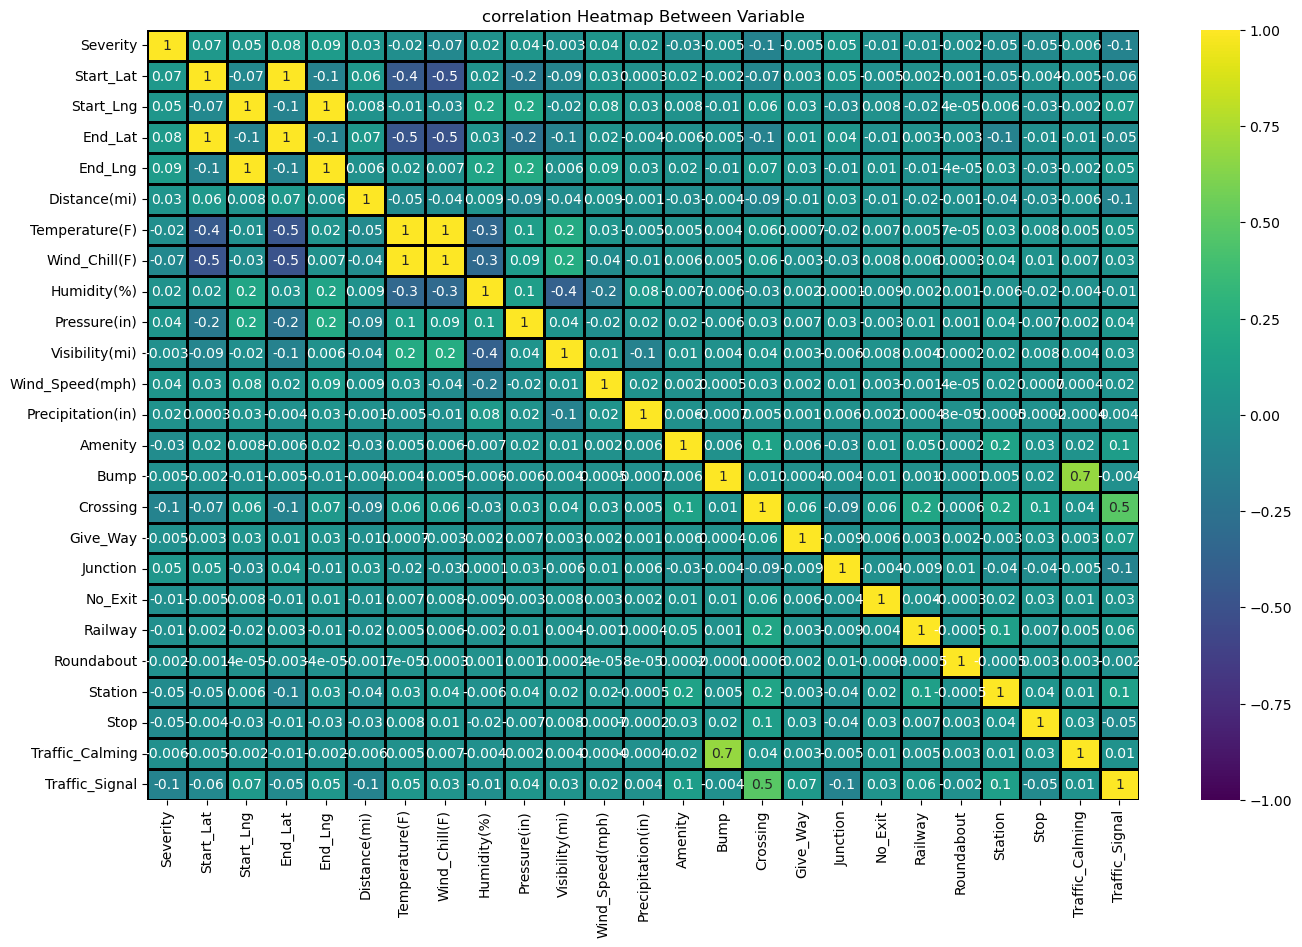

In [13]:
corr = df.select_dtypes (include=['float64', 'int64','bool']).drop(['Turning_Loop'],axis=1).corr(method="pearson")
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(corr,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap='viridis',linewidth=1,linecolor="Black")
heatmap.set_title('correlation Heatmap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

# refer:https://matplotlib.org/stable/tutorials/colors/colormaps.html

**CITIES RANKING BY SEVERITY**

In [14]:
cities = df.City.unique()
len(cities)

13679

In [15]:
city_by_accident = df.City.value_counts()
city_by_accident.head(10)

Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: City, dtype: int64

Text(0, 0.5, 'Cities')

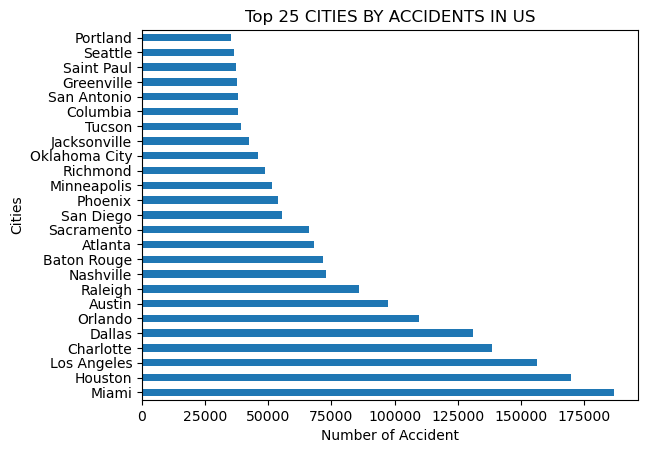

In [16]:
city_by_accident[:25].plot(kind='barh').set(title='Top 25 CITIES BY ACCIDENTS IN US')
plt.xlabel('Number of Accident')
plt.ylabel('Cities')

In [17]:
high = city_by_accident[city_by_accident>=1000]
low = city_by_accident[city_by_accident<1000]

In [18]:
len(high)/len(cities)

0.08904159660793917

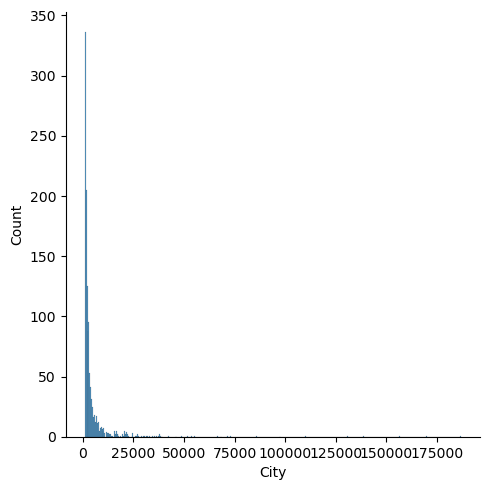

In [19]:
sns.displot(high)

**TOP 25 CITIES WITH SEVERITY > 2**

In [20]:
df.Severity.unique()

array([3, 2, 1, 4])

In [21]:
df_sev = df[df['Severity']>=2]

In [22]:
df_sev.City.value_counts()

Miami                           186751
Houston                         168980
Los Angeles                     156234
Charlotte                       136126
Dallas                          129944
                                 ...  
Maybrook                             1
Heaters                              1
Kimballton                           1
Fairchance                           1
American Fork-Pleasant Grove         1
Name: City, Length: 13664, dtype: int64

Text(0, 0.5, 'Accidents')

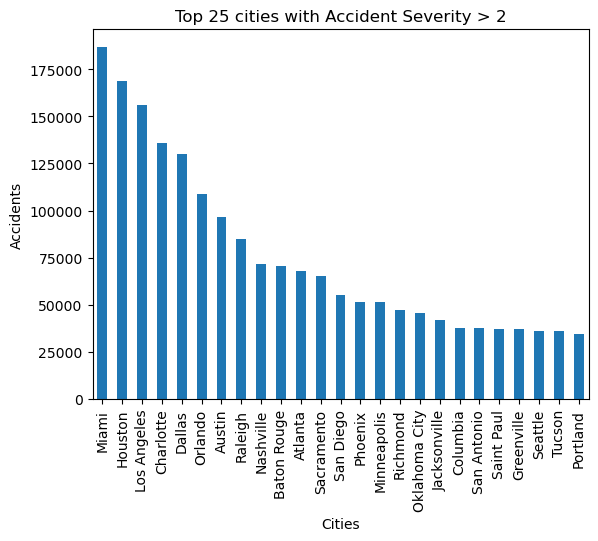

In [23]:
df_sev.City.value_counts().head(25).plot(kind='bar').set(title='Top 25 cities with Accident Severity > 2')
plt.xlabel('Cities')
plt.ylabel('Accidents')